<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/multiclass_classification_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-06 08:54:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   247MB/s    in 2.0s    

2025-01-06 08:54:42 (247 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train

In [4]:
test_dir = '10_food_classes_all_data/test/'
train_dir = '10_food_classes_all_data/train/'

In [5]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


## Preprocess data

In [6]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range =0.2,
    width_shift_range = 0.2,
    zoom_range = 0.2,
    rescale = 1./255
)

test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [7]:
train_data = train_data_gen.flow_from_directory(train_dir,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                shuffle = True,
                                                class_mode = "categorical")
test_data = test_data_gen.flow_from_directory(test_dir,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                shuffle = False,
                                                class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


(-0.5, 223.5, 223.5, -0.5)

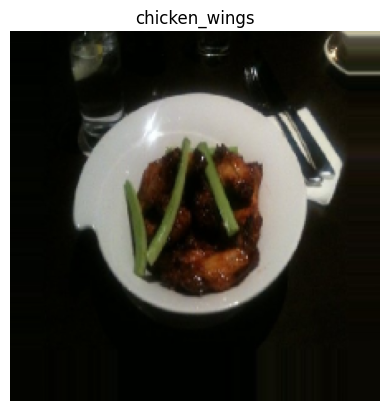

In [8]:
plt.imshow(train_data[0][0][0])
plt.title(class_names[int(tf.argmax(train_data[0][1][0]))])
plt.axis('off')

## Build a CNN model

In [10]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model1.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

hist1 = model1.fit(train_data,
           epochs = 5,
           validation_data = test_data)


Epoch 1/5
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.1245 - loss: 2.3095

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 126s 518ms/step - accuracy: 0.1248 - loss: 2.3089 - val_accuracy: 0.2772 - val_loss: 2.0482
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 434ms/step - accuracy: 0.2560 - loss: 2.0753 - val_accuracy: 0.3120 - val_loss: 1.9359
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 423ms/step - accuracy: 0.3046 - loss: 1.9855 - val_accuracy: 0.3848 - val_loss: 1.8044
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 407ms/step - accuracy: 0.3463 - loss: 1.8901 - val_accuracy: 0.3972 - val_loss: 1.7522
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 406ms/step - accuracy: 0.3641 - loss: 1.8433 - val_accuracy: 0.4160 - val_loss: 1.7351


In [27]:
model1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.4334 - loss: 1.6330


[1.6522183418273926, 0.44359999895095825]

In [12]:
pd.DataFrame(hist1.history)

,accuracy,loss,val_accuracy,val_loss
0,0.160133,2.235533,0.2772,2.048153
1,0.260400,2.053360,0.3120,1.935855
2,0.302933,1.968907,0.3848,1.804433
3,0.348800,1.884501,0.3972,1.752249
4,0.359200,1.853463,0.4160,1.735052


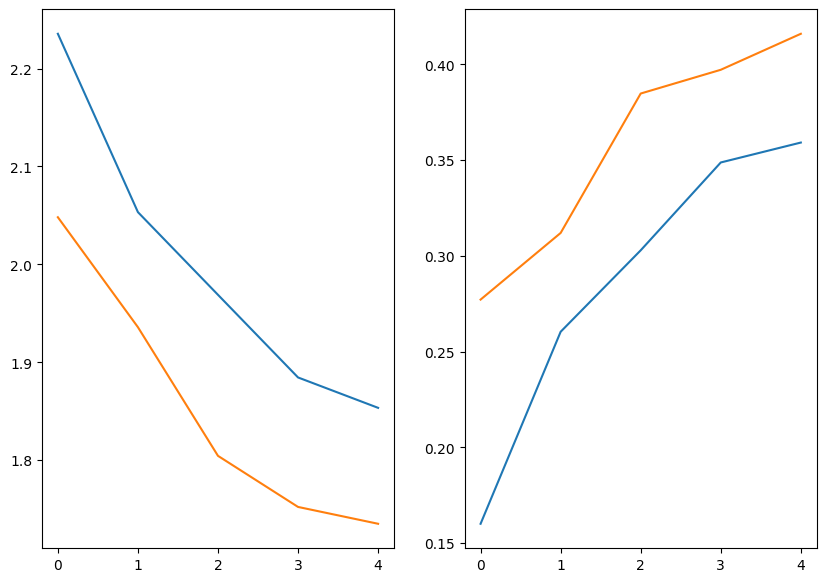

In [15]:
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
plt.plot(pd.DataFrame(hist1.history)[['loss', 'val_loss']])
plt.subplot(1,2,2)
plt.plot(pd.DataFrame(hist1.history)[['accuracy', 'val_accuracy']])

## using function from previous notebook to make predictions

In [19]:
!wget https://bbqchiefs.com/wp-content/uploads/2019/04/Ribeye-Steak-Garlic-Butter.jpg

--2025-01-06 09:10:20--  https://bbqchiefs.com/wp-content/uploads/2019/04/Ribeye-Steak-Garlic-Butter.jpg
Resolving bbqchiefs.com (bbqchiefs.com)... 192.0.78.142, 192.0.78.213
Connecting to bbqchiefs.com (bbqchiefs.com)|192.0.78.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1947328 (1.9M) [image/jpeg]
Saving to: ‘Ribeye-Steak-Garlic-Butter.jpg’

Ribeye-Steak-Garlic 100%[===================>]   1.86M  10.4MB/s    in 0.2s    

2025-01-06 09:10:21 (10.4 MB/s) - ‘Ribeye-Steak-Garlic-Butter.jpg’ saved [1947328/1947328]



In [16]:
def load_and_prep_img(file_name):
  """
  Reads an image and reshapes it
  """

  img = tf.io.read_file(file_name)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [224,224])
  img = img/255
  img = tf.expand_dims(img, axis = 0)
  return img

In [17]:
def pred_interpret(class_names, pred):
  pred = tf.round(pred)
  return class_names[int(pred[0][0])]

In [18]:
def plot_and_pred(model,file_name, class_names):
  img = load_and_prep_img(file_name)
  pred = model.predict(img)
  pred = pred_interpret(class_names,pred)
  plt.imshow(tf.squeeze(img))
  plt.title(f"Prediction: {pred}")
  plt.axis("off")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


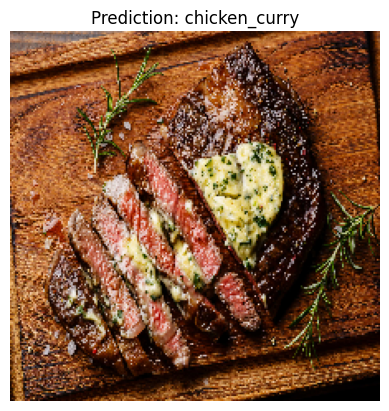

In [20]:
plot_and_pred(model1,'/content/Ribeye-Steak-Garlic-Butter.jpg', class_names=class_names)

## conclusion : this model is kinda shit so experiment time


### Experiment 1: Adding more conv layers

In [29]:
# adding 2 conv layers and 1 maxpool layer

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

hist2 = model2.fit(train_data,
           epochs = 5,
           validation_data = test_data)


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 114s 452ms/step - accuracy: 0.1421 - loss: 2.2556 - val_accuracy: 0.2884 - val_loss: 1.9992
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 132s 423ms/step - accuracy: 0.2564 - loss: 2.0711 - val_accuracy: 0.3116 - val_loss: 1.9353
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 426ms/step - accuracy: 0.2763 - loss: 2.0010 - val_accuracy: 0.3196 - val_loss: 1.9527
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 412ms/step - accuracy: 0.2999 - loss: 1.9864 - val_accuracy: 0.3460 - val_loss: 1.8571
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 99s 408ms/step - accuracy: 0.3152 - loss: 1.9491 - val_accuracy: 0.3716 - val_loss: 1.8249


In [30]:
model2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.3952 - loss: 1.7993


[1.8249273300170898, 0.3716000020503998]

In [31]:
pd.DataFrame(hist2.history)

,accuracy,loss,val_accuracy,val_loss
0,0.182667,2.194249,0.2884,1.999233
1,0.263200,2.061309,0.3116,1.935305
2,0.278133,2.015379,0.3196,1.952699
3,0.304800,1.973483,0.3460,1.857102
4,0.318533,1.942573,0.3716,1.824927


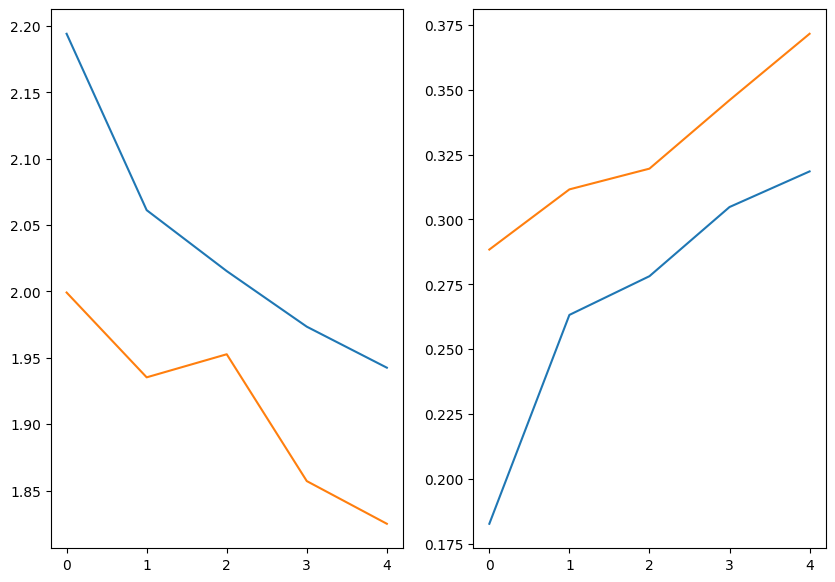

In [32]:
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
plt.plot(pd.DataFrame(hist2.history)[['loss', 'val_loss']])
plt.subplot(1,2,2)
plt.plot(pd.DataFrame(hist2.history)[['accuracy', 'val_accuracy']])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


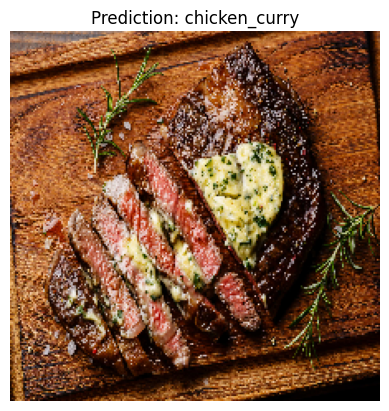

In [33]:
plot_and_pred(model2,'/content/Ribeye-Steak-Garlic-Butter.jpg', class_names=class_names)

##3 More epochs

In [34]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

hist3 = model3.fit(train_data,
           epochs = 10,
           validation_data = test_data)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 409ms/step - accuracy: 0.1504 - loss: 2.2447 - val_accuracy: 0.2936 - val_loss: 2.0173
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 422ms/step - accuracy: 0.2674 - loss: 2.0642 - val_accuracy: 0.2680 - val_loss: 2.0125
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 414ms/step - accuracy: 0.3116 - loss: 1.9757 - val_accuracy: 0.3744 - val_loss: 1.8272
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 404ms/step - accuracy: 0.3378 - loss: 1.9388 - val_accuracy: 0.3852 - val_loss: 1.8147
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 399ms/step - accuracy: 0.3453 - loss: 1.9024 - val_accuracy: 0.4024 - val_loss: 1.7739
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 98s 405ms/step - accuracy: 0.3475 - loss: 1.8740 - val_accuracy: 0.4000 - val_loss: 1.7740
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 418ms/step - accuracy: 0.3651 - loss: 1.8437 - val_accuracy: 0.4140 - val_loss: 1.7421
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 401ms/step - accuracy: 0.3760 - lo

In [35]:
model3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.4254 - loss: 1.6997


[1.671126127243042, 0.4392000138759613]

In [36]:
pd.DataFrame(hist3.history)

,accuracy,loss,val_accuracy,val_loss
0,0.185867,2.183265,0.2936,2.017312
1,0.277467,2.043226,0.2680,2.012475
2,0.314800,1.964888,0.3744,1.827211
3,0.337333,1.928862,0.3852,1.814705
4,0.348533,1.888674,0.4024,1.773918
5,0.353467,1.868181,0.4000,1.774015
6,0.367867,1.838037,0.4140,1.742084
7,0.376800,1.816184,0.3856,1.798504
8,0.379600,1.808323,0.4168,1.703403
9,0.390000,1.789308,0.4392,1.671126


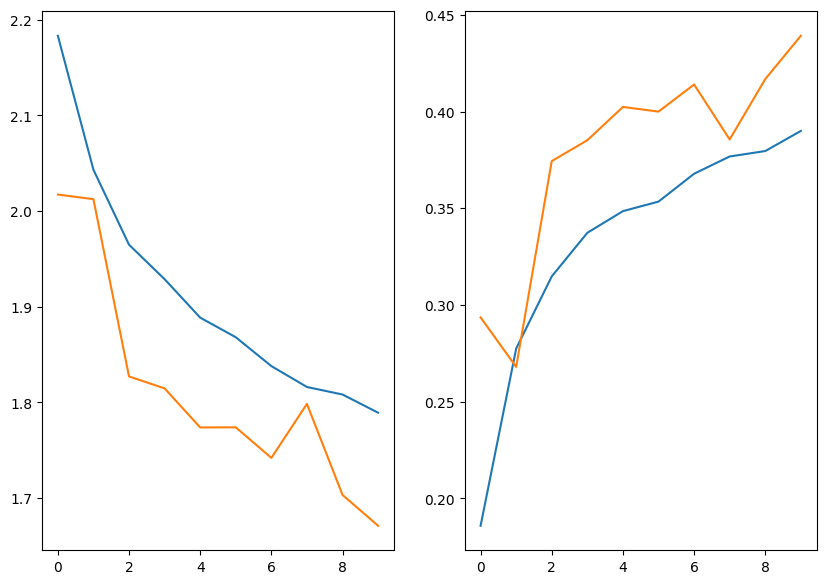

In [37]:
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
plt.plot(pd.DataFrame(hist3.history)[['loss', 'val_loss']])
plt.subplot(1,2,2)
plt.plot(pd.DataFrame(hist3.history)[['accuracy', 'val_accuracy']])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


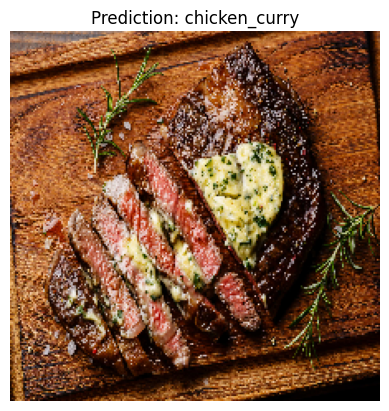

In [38]:
plot_and_pred(model3,'/content/Ribeye-Steak-Garlic-Butter.jpg', class_names=class_names)

## Saving best model

In [40]:
model3.save("model4.keras")